# Initializers

In the document we learn how to use different initializers for morphological layers. 

In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
import skimage
print(skimage.__version__)
print(tensorflow.__version__)
print(np.__version__)

0.15.0
2.2.0
1.18.1


In [2]:
from morpholayers import *
from morpholayers.layers import *
from morpholayers.initializers import *

In [3]:
from tensorflow.keras.layers import Input,Lambda,ZeroPadding2D
from tensorflow.keras.models import Model

In [4]:
from imageio import imread

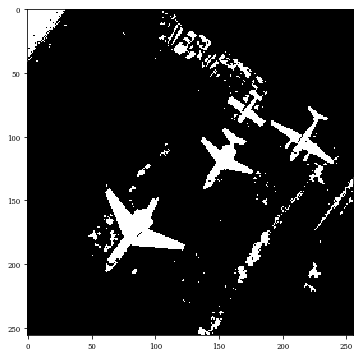

In [5]:
I=imread('./Images/airplane00.png')*1.
I=(I[:,:,0:1]>200)*1.
size_im=I.shape

plt.figure(figsize=(6,6))
plt.imshow(I[:,:,0])
plt.gray()
plt.show()



**{index}`Initializers`** define the way to set the initial random weights of Keras layers. For the case of a morphological layer, one should take into account that the operators is performed in the max-plus algebra.

Keras proposes some initializations (https://keras.io/initializers/) for linear convolution than can be used in morpholayers:

1. Zeros: Flat SE (Used as default value):

    ``Dilation2D(1,kernel_size=(7,7),kernel_initializer='Zeros')``, describe a squared flat structuring element of side 7 pixels.
2. RandomNormal(mean=0.0, stddev=0.05):

    ``Dilation2D(1,kernel_size=(7,7),kernel_initializer=RandomNormal(stddev=0.01))``, describe a non-flat structuring element of side 7 pixels with random values from a Normal distribution with zero-mean and 0.01 as standard deviation.
3. RandomUniform(minval=-0.05, maxval=0.05)
4. Ones: All value on 1. (Non-sense in the case of a morphological layer)

New initializations for structuring elements are availables in morpholayers.py:
1. **{index}`Quadratic`**: Quadratic(t,c)
2. **{index}`RandomLattice`**: Random values between (-$\infty$ and $\infty$) 
3. **{index}`RandomNegativeLattice`**: Random values between (-$\infty$ and $0$) 
3. **{index}`MinusOnesZeroCenter`**: Identity SE (0 in the center and -$\infty$ otherwise)
4. **{index}`SignedOnes`**: Random (-$\infty$ or $\infty$) values
5. **{index}`SparseZeros`**: SparseZeros(th=.95),(th*100)\% values in -$\infty$ and the rest to $0$.
6. **{index}`SparseNumZeros`**: SparseNumZeros(th=0),(th+1) values in $0$ and the rest to -$\infty$.
7. **{index}`RandomwithMinLattice`**: Random values between (-$\infty$ and $\infty$) and center to $-\infty$
8. **{index}`RandomwithZeroLattice`**: Random values between (-$\infty$ and $\infty$) and center to $0$
9. **{index}`RandomwithMaxLattice`**: Random values between (-$\infty$ and $\infty$) and center to $\infty$

```{note}
Note -$\infty$ and $\infty$ values are defined in morpho.py file. By default, we consider -$\infty=-1$ or $\infty=1$, i.e., images values in $[0,1]$.
```

## Zeros

In [6]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),kernel_initializer='Zeros')(InLayer)
model=Model(InLayer,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d (Dilation2D)      (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


Visualization of $W$, in this case a constant value equation to zero.

(7, 7, 1, 1)


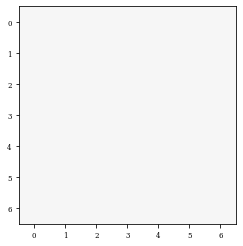

Max Value 0.0 Min Value 0.0


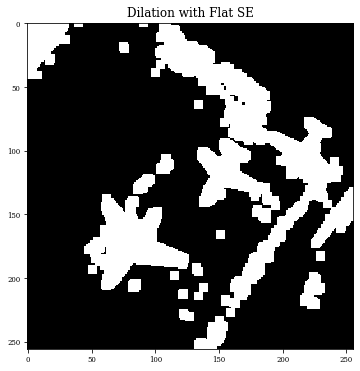

In [7]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.show()
print('Max Value',SE.max(),'Min Value',SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with Flat SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

In [8]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),kernel_initializer='RandomUniform')(InLayer)

model=Model(InLayer,x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_1 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


Visualization of $W$, in this case random uniform values between -0.05 and 0.05.

(7, 7, 1, 1)


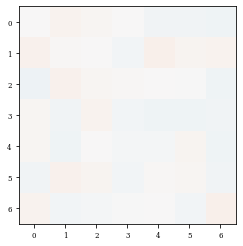

0.046920624 -0.049540937


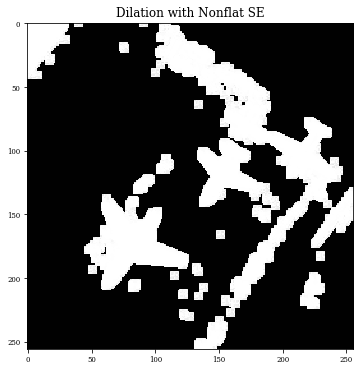

In [9]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.show()
print(SE.max(),SE.min())


Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with Nonflat SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## Quadratic

In [10]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),kernel_initializer=Quadratic(cvalue=.2,tvalue=2))(InLayer)
model=Model(InLayer,x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_2 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


$W$ is a quadratic SE with default value $t=2$ and $c=0.02$

(7, 7, 1, 1)
-0.0 -0.9


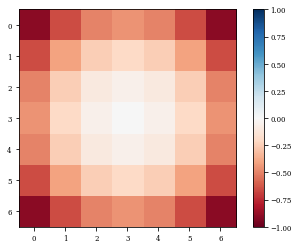

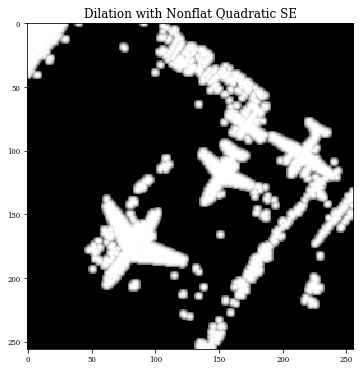

In [11]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with Nonflat Quadratic SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## RandomLattice

In [12]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=RandomLattice)(InLayer)
model=Model(InLayer,x)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_3 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


$W$ is a random values between $-1$ a $1$

(7, 7, 1, 1)
0.9823985 -0.9326203


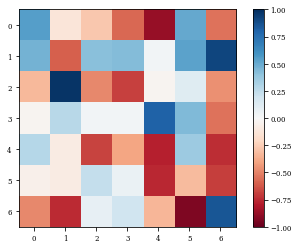

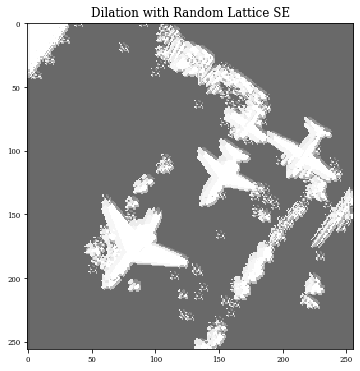

In [13]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with Random Lattice SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## MinusOnesZeroCenter

In [14]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=MinusOnesZeroCenter)(InLayer)
model=Model(InLayer,x)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_4 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


(7, 7, 1, 1)
0.0 -1.0


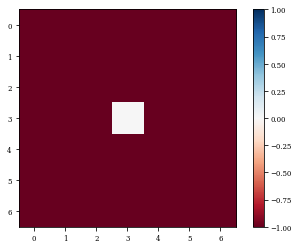

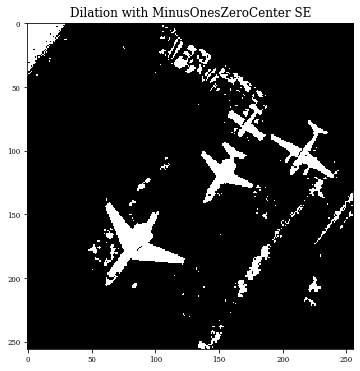

In [15]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with MinusOnesZeroCenter SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## SignedOnes

In [16]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=SignedOnes)(InLayer)
model=Model(InLayer,x)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_5 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


(7, 7, 1, 1)
1.0 -1.0
[[-1.]]


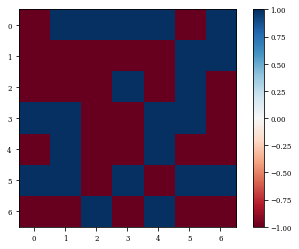

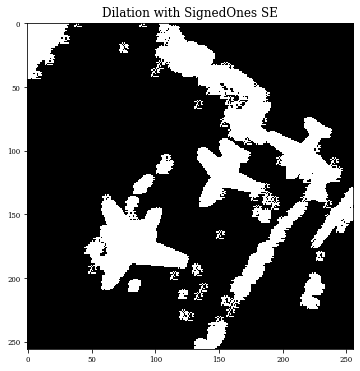

In [17]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())
print(SE[3,3])

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with SignedOnes SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## SparseZeros

In [18]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=SparseZeros(th=.9))(InLayer)
model=Model(InLayer,x)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_6 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


(7, 7, 1, 1)
0.0 -1.0


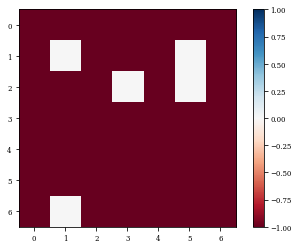

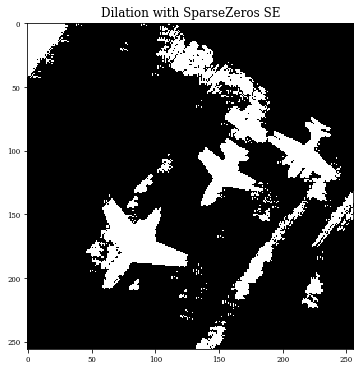

In [19]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with SparseZeros SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## SparseNumZeros

In [20]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=SparseNumZeros(th=0))(InLayer)
model=Model(InLayer,x)
model.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_7 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


$W$ has all values in $-\infty$ except for one. This produce a translation of the image!

(7, 7, 1, 1)
0.0 -1.0


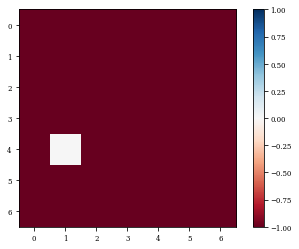

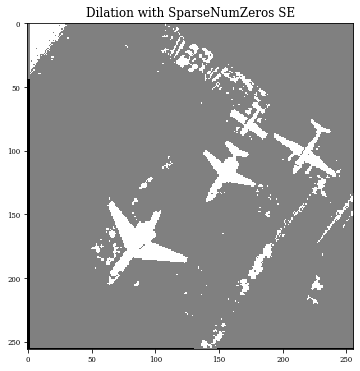

In [21]:
listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with SparseNumZeros SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## RandomNegativeLattice

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_8 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
(7, 7, 1, 1)
-0.04034376 -0.99245477


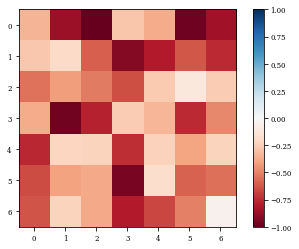

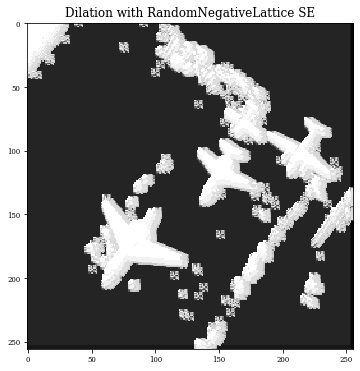

In [22]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=RandomNegativeLattice())(InLayer)
model=Model(InLayer,x)
model.summary()

listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with RandomNegativeLattice SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## RandomwithZeroLattice

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_9 (Dilation2D)    (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
(7, 7, 1, 1)
0.9844159 -0.99327016


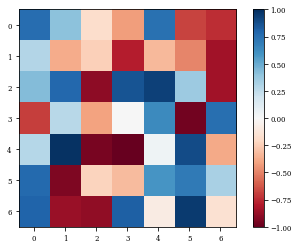

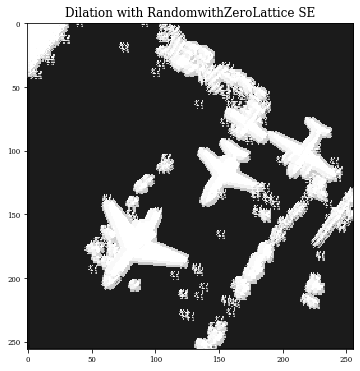

In [23]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=RandomwithZeroLattice())(InLayer)
model=Model(InLayer,x)
model.summary()


listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with RandomwithZeroLattice SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## RandomwithMaxLattice

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_10 (Dilation2D)   (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
(7, 7, 1, 1)
1.0 -0.91787416


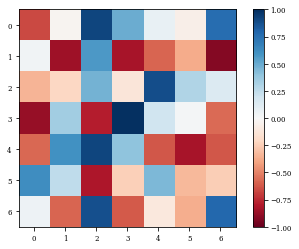

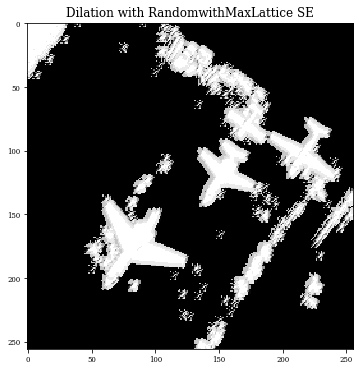

In [24]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=RandomwithMaxLattice())(InLayer)
model=Model(InLayer,x)
model.summary()

listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with RandomwithMaxLattice SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()

## RandomwithMinLattice

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 256, 256, 1)]     0         
_________________________________________________________________
dilation2d_11 (Dilation2D)   (None, 256, 256, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
(7, 7, 1, 1)
0.97744006 -1.0


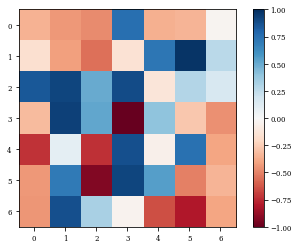

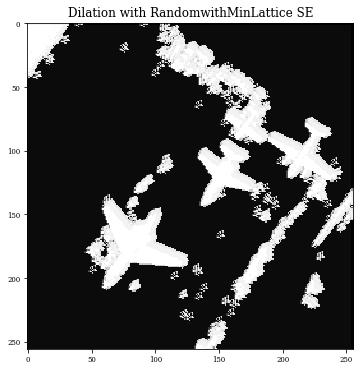

In [25]:
InLayer=Input(size_im)
x=Dilation2D(1,kernel_size=(7,7),padding='same',kernel_initializer=RandomwithMinLattice())(InLayer)
model=Model(InLayer,x)
model.summary()

listW=model.get_weights()
SE=listW[-1]
print(SE.shape)
plt.figure()
plt.imshow(SE[:,:,0,0],cmap='RdBu',vmax=1,vmin=-1)
plt.colorbar()
print(SE.max(),SE.min())

Z=model.predict(np.expand_dims(I,axis=0))
plt.figure(figsize=(6,6))
plt.title('Dilation with RandomwithMinLattice SE')
plt.imshow(Z[0,:,:,0]/255)
plt.show()